In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.1


In [3]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [4]:
img_width = 180
img_height = 180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 3115 files belonging to 36 classes.


In [8]:
data_cat = data_train.class_names

In [63]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size = (img_width, img_height),
    batch_size = 32,
    shuffle = False,
    validation_split = False
)

Found 351 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size = (img_width, img_height),
    shuffle = False,
    batch_size = 32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


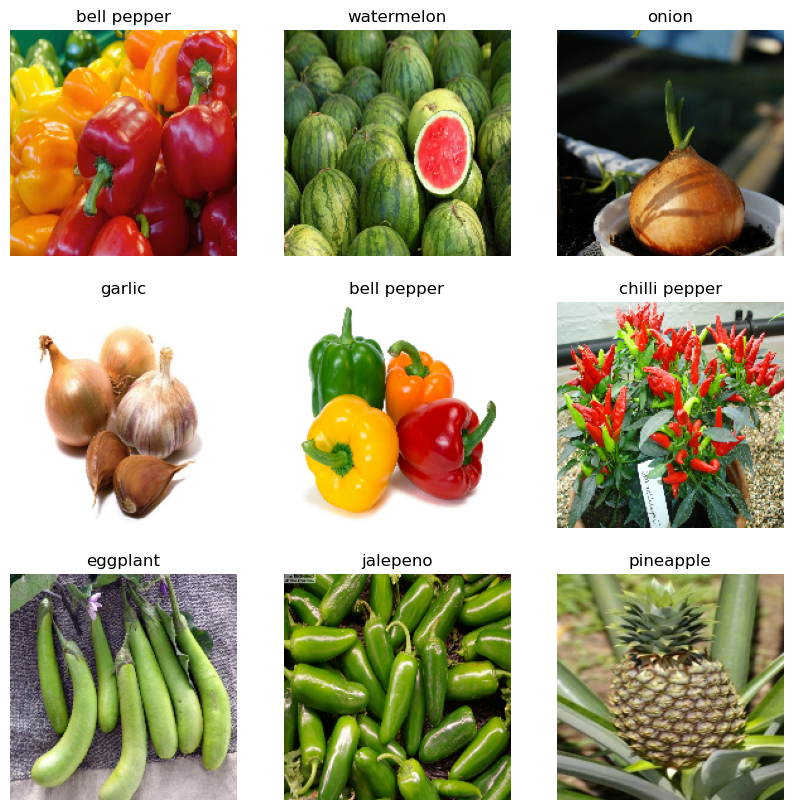

In [13]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [14]:
from tensorflow.keras.models import Sequential
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [18]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)

In [20]:
data_train_small = data_train.take(1000)
data_val_small = data_val.take(200)

epochs_size = 5
history = model.fit(
    data_train_small, 
    validation_data=data_val_small, 
    epochs=epochs_size
)

Epoch 1/5
 5/98 [>.............................] - ETA: 42s - loss: 0.0146 - accuracy: 1.0000

2024-10-10 14:52:50.842893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 38s - loss: 0.0143 - accuracy: 1.0000

2024-10-10 14:52:51.332703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/98 [==>...........................] - ETA: 38s - loss: 0.0543 - accuracy: 0.9974

2024-10-10 14:52:53.789026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 35s - loss: 0.0531 - accuracy: 0.9933

2024-10-10 14:52:54.536081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 35s - loss: 0.0506 - accuracy: 0.9937

2024-10-10 14:52:54.900397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 31s - loss: 0.0502 - accuracy: 0.9918

2024-10-10 14:52:56.108981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 31s - loss: 0.0480 - accuracy: 0.9922

2024-10-10 14:52:56.713958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:52:56.766381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/98 [======>.......................] - ETA: 28s - loss: 0.0427 - accuracy: 0.9937

2024-10-10 14:52:58.156101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 26s - loss: 0.0398 - accuracy: 0.9944

2024-10-10 14:52:59.261807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 25s - loss: 0.0393 - accuracy: 0.9940

2024-10-10 14:53:00.549616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 22s - loss: 0.0677 - accuracy: 0.9910

2024-10-10 14:53:03.070075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 14s - loss: 0.0629 - accuracy: 0.9894

2024-10-10 14:53:10.593145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:53:10.593385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 13s - loss: 0.0615 - accuracy: 0.9898

2024-10-10 14:53:11.392478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 12s - loss: 0.0633 - accuracy: 0.9889

2024-10-10 14:53:12.701094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:53:12.885995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


72/98 [=====================>........] - ETA: 9s - loss: 0.0729 - accuracy: 0.9861

2024-10-10 14:53:14.753489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 9s - loss: 0.0722 - accuracy: 0.9863

2024-10-10 14:53:15.061692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 7s - loss: 0.0735 - accuracy: 0.9854

2024-10-10 14:53:16.937207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 5s - loss: 0.0727 - accuracy: 0.9855

2024-10-10 14:53:19.095754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 4s - loss: 0.0736 - accuracy: 0.9842

2024-10-10 14:53:20.215761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


87/98 [=========================>....] - ETA: 4s - loss: 0.0721 - accuracy: 0.9846

2024-10-10 14:53:21.043016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0848 - accuracy: 0.9827

2024-10-10 14:53:25.862195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:53:26.564358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 42s 401ms/step - loss: 0.0848 - accuracy: 0.9827 - val_loss: 0.3184 - val_accuracy: 0.9630
Epoch 2/5
 5/98 [>.............................] - ETA: 40s - loss: 0.0934 - accuracy: 0.9688

2024-10-10 14:53:32.391650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 36s - loss: 0.0829 - accuracy: 0.9740

2024-10-10 14:53:32.906229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 39s - loss: 0.1097 - accuracy: 0.9773

2024-10-10 14:53:35.364132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 35s - loss: 0.1278 - accuracy: 0.9777

2024-10-10 14:53:36.125979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 34s - loss: 0.1449 - accuracy: 0.9771

2024-10-10 14:53:36.500255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 31s - loss: 0.1303 - accuracy: 0.9770

2024-10-10 14:53:37.783357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 30s - loss: 0.1275 - accuracy: 0.9766

2024-10-10 14:53:38.362223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:53:38.420042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 28s - loss: 0.1261 - accuracy: 0.9766

2024-10-10 14:53:39.576876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 26s - loss: 0.1188 - accuracy: 0.9780

2024-10-10 14:53:40.664651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 25s - loss: 0.1346 - accuracy: 0.9771

2024-10-10 14:53:41.870291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 22s - loss: 0.1201 - accuracy: 0.9778

2024-10-10 14:53:44.677794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 15s - loss: 0.1080 - accuracy: 0.9772

2024-10-10 14:53:53.633980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:53:53.634132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 14s - loss: 0.1058 - accuracy: 0.9773

2024-10-10 14:53:54.935777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 12s - loss: 0.1092 - accuracy: 0.9768

2024-10-10 14:53:56.316386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 12s - loss: 0.1087 - accuracy: 0.9767

2024-10-10 14:53:56.632757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 9s - loss: 0.1081 - accuracy: 0.9769 

2024-10-10 14:53:59.367394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:53:59.665704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 8s - loss: 0.1097 - accuracy: 0.9765

2024-10-10 14:54:01.747952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 6s - loss: 0.1060 - accuracy: 0.9768

2024-10-10 14:54:04.696829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 5s - loss: 0.1048 - accuracy: 0.9772

2024-10-10 14:54:05.955385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


87/98 [=========================>....] - ETA: 4s - loss: 0.1032 - accuracy: 0.9774

2024-10-10 14:54:06.653424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.1036 - accuracy: 0.9772

2024-10-10 14:54:11.549606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:54:12.319947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 46s 444ms/step - loss: 0.1036 - accuracy: 0.9772 - val_loss: 0.3590 - val_accuracy: 0.9630
Epoch 3/5
 5/98 [>.............................] - ETA: 39s - loss: 0.0262 - accuracy: 0.9937

2024-10-10 14:54:18.239525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 36s - loss: 0.0252 - accuracy: 0.9948

2024-10-10 14:54:18.780901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 38s - loss: 0.0838 - accuracy: 0.9886

2024-10-10 14:54:21.199073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 35s - loss: 0.1175 - accuracy: 0.9844

2024-10-10 14:54:22.051755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 35s - loss: 0.1164 - accuracy: 0.9833

2024-10-10 14:54:22.454188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 32s - loss: 0.1052 - accuracy: 0.9836

2024-10-10 14:54:23.959933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 31s - loss: 0.1112 - accuracy: 0.9812

2024-10-10 14:54:24.562409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:54:24.616980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 29s - loss: 0.1045 - accuracy: 0.9818

2024-10-10 14:54:25.909145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 28s - loss: 0.0967 - accuracy: 0.9838

2024-10-10 14:54:27.127080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 26s - loss: 0.1043 - accuracy: 0.9829

2024-10-10 14:54:28.559455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 23s - loss: 0.1012 - accuracy: 0.9811

2024-10-10 14:54:31.159881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 14s - loss: 0.0934 - accuracy: 0.9820

2024-10-10 14:54:38.735011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:54:38.735327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 14s - loss: 0.0912 - accuracy: 0.9821

2024-10-10 14:54:39.624491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 12s - loss: 0.0894 - accuracy: 0.9822

2024-10-10 14:54:40.914775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:54:41.112573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 10s - loss: 0.0878 - accuracy: 0.9820

2024-10-10 14:54:43.019635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


72/98 [=====================>........] - ETA: 9s - loss: 0.0901 - accuracy: 0.9813 

2024-10-10 14:54:43.421634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 7s - loss: 0.0875 - accuracy: 0.9817

2024-10-10 14:54:45.324098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 6s - loss: 0.0872 - accuracy: 0.9813

2024-10-10 14:54:47.552361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 4s - loss: 0.0882 - accuracy: 0.9801

2024-10-10 14:54:48.670944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 4s - loss: 0.0877 - accuracy: 0.9800

2024-10-10 14:54:49.341080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0892 - accuracy: 0.9782

2024-10-10 14:54:54.078450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:54:54.810306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 42s 408ms/step - loss: 0.0892 - accuracy: 0.9782 - val_loss: 0.2850 - val_accuracy: 0.9630
Epoch 4/5
 5/98 [>.............................] - ETA: 41s - loss: 0.0586 - accuracy: 0.9812

2024-10-10 14:55:00.691113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 37s - loss: 0.0524 - accuracy: 0.9844

2024-10-10 14:55:01.218826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 40s - loss: 0.1267 - accuracy: 0.9744

2024-10-10 14:55:03.805214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 36s - loss: 0.1120 - accuracy: 0.9754

2024-10-10 14:55:04.716536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 35s - loss: 0.1186 - accuracy: 0.9750

2024-10-10 14:55:05.167791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 32s - loss: 0.1033 - accuracy: 0.9786

2024-10-10 14:55:06.566247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 32s - loss: 0.0987 - accuracy: 0.9797

2024-10-10 14:55:07.119185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:55:07.206174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 31s - loss: 0.0896 - accuracy: 0.9805

2024-10-10 14:55:08.670885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 28s - loss: 0.1041 - accuracy: 0.9788

2024-10-10 14:55:09.972115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 27s - loss: 0.0949 - accuracy: 0.9808

2024-10-10 14:55:11.474848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 24s - loss: 0.0884 - accuracy: 0.9811

2024-10-10 14:55:14.149493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 16s - loss: 0.0784 - accuracy: 0.9828

2024-10-10 14:55:22.139935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:55:22.140219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 14s - loss: 0.0776 - accuracy: 0.9826

2024-10-10 14:55:23.023085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 13s - loss: 0.0765 - accuracy: 0.9822

2024-10-10 14:55:24.457697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:55:24.667106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 10s - loss: 0.0751 - accuracy: 0.9820

2024-10-10 14:55:26.643567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


72/98 [=====================>........] - ETA: 10s - loss: 0.0752 - accuracy: 0.9818

2024-10-10 14:55:27.117685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 8s - loss: 0.0748 - accuracy: 0.9813

2024-10-10 14:55:29.396471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 6s - loss: 0.0748 - accuracy: 0.9809

2024-10-10 14:55:31.971925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 5s - loss: 0.0739 - accuracy: 0.9809

2024-10-10 14:55:33.236875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


86/98 [=========================>....] - ETA: 4s - loss: 0.0738 - accuracy: 0.9807

2024-10-10 14:55:33.938425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0799 - accuracy: 0.9804

2024-10-10 14:55:39.163062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:55:39.923335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 45s 436ms/step - loss: 0.0799 - accuracy: 0.9804 - val_loss: 0.3174 - val_accuracy: 0.9601
Epoch 5/5
 5/98 [>.............................] - ETA: 40s - loss: 0.1113 - accuracy: 0.9750

2024-10-10 14:55:45.800401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 37s - loss: 0.0958 - accuracy: 0.9792

2024-10-10 14:55:46.327230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 40s - loss: 0.0849 - accuracy: 0.9744

2024-10-10 14:55:48.879747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 36s - loss: 0.0690 - accuracy: 0.9799

2024-10-10 14:55:49.746568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 35s - loss: 0.0657 - accuracy: 0.9812

2024-10-10 14:55:50.143110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 32s - loss: 0.0933 - accuracy: 0.9770

2024-10-10 14:55:51.492863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 32s - loss: 0.0923 - accuracy: 0.9766

2024-10-10 14:55:52.018215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:55:52.070420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 30s - loss: 0.1049 - accuracy: 0.9755

2024-10-10 14:55:53.273128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 28s - loss: 0.0995 - accuracy: 0.9780

2024-10-10 14:55:54.342356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 26s - loss: 0.1010 - accuracy: 0.9771

2024-10-10 14:55:55.491945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 22s - loss: 0.0941 - accuracy: 0.9770

2024-10-10 14:55:58.124380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 14s - loss: 0.0847 - accuracy: 0.9799

2024-10-10 14:56:05.722593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:56:05.722940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 13s - loss: 0.0863 - accuracy: 0.9800

2024-10-10 14:56:06.477221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 12s - loss: 0.0899 - accuracy: 0.9793

2024-10-10 14:56:07.786038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:56:08.040337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 9s - loss: 0.0850 - accuracy: 0.9798 

2024-10-10 14:56:10.102686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


72/98 [=====================>........] - ETA: 9s - loss: 0.0846 - accuracy: 0.9796

2024-10-10 14:56:10.620857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 7s - loss: 0.0827 - accuracy: 0.9789

2024-10-10 14:56:12.844548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 6s - loss: 0.0799 - accuracy: 0.9794

2024-10-10 14:56:15.131132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


85/98 [=========================>....] - ETA: 4s - loss: 0.0782 - accuracy: 0.9798

2024-10-10 14:56:16.258547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


87/98 [=========================>....] - ETA: 4s - loss: 0.0784 - accuracy: 0.9795

2024-10-10 14:56:16.942794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0788 - accuracy: 0.9788

2024-10-10 14:56:22.001545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-10-10 14:56:22.820398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 43s 413ms/step - loss: 0.0788 - accuracy: 0.9788 - val_loss: 0.3642 - val_accuracy: 0.9516


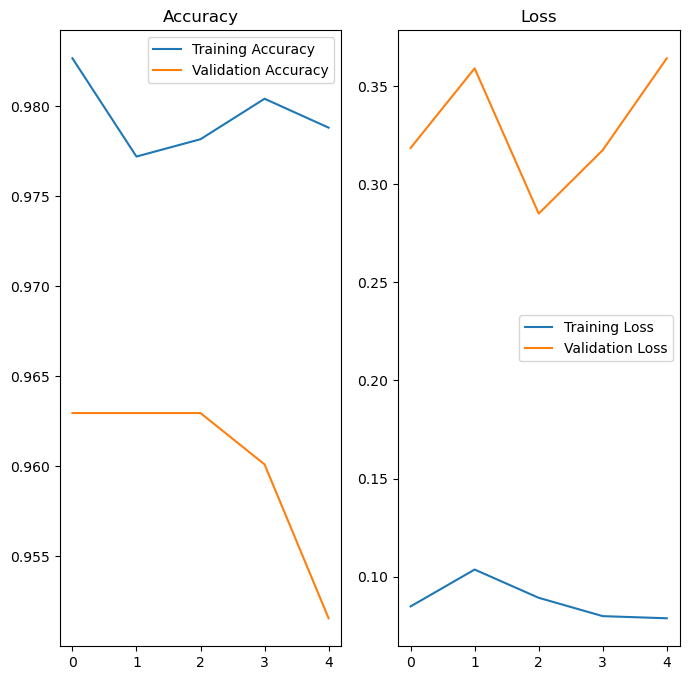

In [24]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [58]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, 0)

In [59]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 31ms/step


In [60]:
score = tf.nn.softmax(predict)

In [61]:
print('Veg/fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/fruit in image is corn with accuracy of 93.01


In [62]:
model.save('Image_classify.keras')